# Table of Contents:               
##### *Please note that you can click on any topic or subtopic to go to*
- [Setup](#setup)
    - [Impoting Packages](#importing-packaging)
    - [Loading Data](#loading-data)
- [Correlation](#)
    1. [Pearson CC](#)
    2. [Spearman](#)
- [Hypothesis Testing](#hypo)
    1. [Hypothesis I : Samples are paired](#hypo1)
    2. [Hypothesis II : Samples are Independent](#hypo2)
    3. [Common andDistinct DEGs after FDR](#com)
    4. [Visualizations](#vis)
    5. [Saving Data](#saving)

# Setup <a class="anchor" id="setup"></a>

## Importing Packages<a class="anchor" id="importing-packaging"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from time import time 
from scipy.stats import (pearsonr, spearmanr, ttest_rel, ttest_ind)
from statsmodels.stats.multitest import multipletests


## Loading Data<a class="anchor" id="loading-data"></a>

In [2]:
# loading the datasets into two dataframes healthy and cancerous
healthy_df = pd.read_csv('lusc-rsem-fpkm-tcga_paired.txt',sep= '\t')
cancerous_df = pd.read_csv('lusc-rsem-fpkm-tcga-t_paired.txt',sep='\t')

#To show all columns for any dataframe
pd.options.display.max_columns = None

In [3]:
healthy_df

,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,TCGA-22-5471,TCGA-22-4609,TCGA-22-5482,TCGA-56-8082,TCGA-22-5483,TCGA-56-8623,TCGA-33-4587,TCGA-56-7579,TCGA-43-3394,TCGA-34-8454,TCGA-77-7338,TCGA-43-6143,TCGA-43-6773,TCGA-51-4080,TCGA-34-7107,TCGA-39-5040,TCGA-43-6771,TCGA-92-7340,TCGA-77-7138,TCGA-77-7142,TCGA-56-7823,TCGA-22-5491,TCGA-22-5481,TCGA-90-7767,TCGA-77-8008,TCGA-56-7730,TCGA-33-6737,TCGA-56-7582,TCGA-56-7731,TCGA-77-7337,TCGA-43-7658,TCGA-56-8201,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,HIST3H2A,92815,62.12,130.60,33.06,35.50,73.03,60.39,92.05,66.65,54.33,15.56,55.49,30.34,14.45,100.83,131.51,59.55,87.03,71.50,23.08,48.87,72.52,115.97,45.21,74.58,8.92,27.44,40.64,35.76,59.13,20.86,37.05,48.18,51.71,49.56,72.01,21.94,27.44,35.00,76.17,28.86,90.77,59.55,40.07,22.92,29.91,82.29,4.70,37.32,43.63,77.25
1,LIN7B,64130,185.11,283.05,119.26,169.07,165.57,161.02,131.51,198.47,175.07,147.06,151.22,84.63,72.01,248.00,363.56,218.79,173.85,253.23,120.10,131.51,110.43,205.50,162.14,363.56,120.10,85.22,214.27,126.12,138.10,214.27,170.25,112.77,111.21,180.02,197.09,111.21,93.35,114.36,231.32,181.28,185.11,119.26,102.97,123.50,264.03,194.36,166.73,105.15,185.11,356.05
2,LXN,56925,909.17,819.30,412.00,743.43,1340.84,607.87,1709.26,1709.26,603.67,555.41,693.58,616.37,518.15,813.63,753.83,769.69,642.59,624.99,854.13,802.41,1037.29,532.74,1088.92,842.36,507.46,769.69,514.56,974.50,1340.84,679.29,444.72,928.30,1233.75,718.08,1051.79,2367.90,389.72,836.53,669.92,460.44,813.63,2400.97,543.96,2193.99,540.19,521.76,253.23,764.36,518.15,878.17
3,CNKSR2,22866,41.81,18.29,40.93,67.12,54.72,29.27,20.26,23.76,28.04,39.22,46.50,42.41,37.85,51.35,24.81,53.95,35.00,54.72,53.95,19.25,34.51,51.71,12.64,25.35,43.32,64.34,43.63,77.25,40.93,33.30,33.30,58.71,29.27,32.59,44.89,55.49,24.11,56.28,39.79,38.40,34.51,70.01,57.49,57.89,67.12,34.51,22.10,31.90,28.24,49.91
4,SCML1,6322,133.36,214.27,108.14,109.66,190.34,211.31,96.01,208.38,120.10,239.52,124.37,249.73,103.69,214.27,162.14,195.72,127.89,127.00,119.26,124.37,180.02,115.16,105.89,334.46,199.85,208.38,195.72,202.66,214.27,132.44,114.36,176.29,195.72,105.89,111.21,228.13,130.60,165.57,159.90,202.66,251.48,209.84,120.10,109.66,155.50,162.14,277.20,86.43,164.42,155.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19643,HAVCR2,84868,423.61,529.06,660.68,620.67,518.15,848.22,366.09,1073.91,363.56,366.09,397.93,497.00,791.35,503.95,547.75,470.14,507.46,368.65,320.80,540.19,808.00,656.11,693.58,412.00,698.41,406.31,397.93,420.68,703.28,185.11,414.87,438.59,551.56,287.01,341.51,373.81,473.41,525.39,480.04,450.94,559.28,579.04,420.68,366.09,334.46,258.57,329.84,1030.12,665.29,633.73
19644,RP1-66C13.4,0,0.00,0.00,1.79,3.32,0.00,0.00,1.79,0.00,0.00,0.00,6.52,5.77,2.20,0.00,2.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.86,0.00,0.00,0.00,4.70,5.45,0.00,0.00,1.81,0.00,0.00,0.00,2.03,4.13,0.00,5.41,0.00,3.35,0.00,4.86,0.00,0.00,2.81,2.84,0.00,0.00,1.08,0.00
19645,C3orf79,152118,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.16,0.00,2.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.10,1.08,0.00,0.00,0.00,0.00,2.61,1.07,0.00,0.00,1.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.07,0.00,0.00
19646,CTD-2116N17.1,0,0.00,0.00,0.99,3.59,2.23,3.35,0.00,7.34,1.41,0.00,2.63,0.00,1.00,3.03,0.00,2.97,0.57,1.00,0.00,1.07,7.69,2.97,3.50,0.54,0.97,0.96,0.00,1.83,1.75,0.56,0.00,1.75,3.35,4.31,0.00,4.13,2.61,2.66,0.55,1.45,6.94,1.00,0.00,4.58,0.96,3.06,1.83,1.77,3.63,2.56


In [4]:
cancerous_df

,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,TCGA-22-5471,TCGA-22-4609,TCGA-22-5482,TCGA-56-8082,TCGA-22-5483,TCGA-56-8623,TCGA-33-4587,TCGA-56-7579,TCGA-43-3394,TCGA-34-8454,TCGA-77-7338,TCGA-43-6143,TCGA-43-6773,TCGA-51-4080,TCGA-34-7107,TCGA-39-5040,TCGA-43-6771,TCGA-92-7340,TCGA-77-7138,TCGA-77-7142,TCGA-56-7823,TCGA-22-5491,TCGA-22-5481,TCGA-90-7767,TCGA-77-8008,TCGA-56-7730,TCGA-33-6737,TCGA-56-7582,TCGA-56-7731,TCGA-77-7337,TCGA-43-7658,TCGA-56-8201,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,HIST3H2A,92815,336.79,500.46,703.28,287.01,486.75,70.51,145.02,14.03,397.93,318.57,463.65,6.78,242.88,135.24,363.56,231.32,403.50,136.19,130.60,285.03,156.59,954.43,454.09,110.43,16.51,447.82,103.69,187.71,127.89,718.08,836.53,98.73,80.57,260.38,197.09,223.41,343.89,303.44,115.16,74.06,3.06,420.68,109.66,106.63,1233.75,172.65,303.44,228.13,251.48,23.59
1,LIN7B,64130,105.15,212.78,102.25,212.78,172.65,244.57,105.89,152.28,258.57,218.79,249.73,199.85,215.77,215.77,62.56,231.32,173.85,164.42,81.71,217.27,323.03,373.81,136.19,231.32,153.34,177.53,181.28,49.91,181.28,435.55,162.14,87.03,199.85,305.55,165.57,162.14,171.45,80.57,215.77,106.63,135.24,135.24,151.22,395.18,295.11,120.94,114.36,96.68,277.20,153.34
2,LXN,56925,848.22,236.21,271.48,759.08,61.25,620.67,329.84,599.49,587.13,638.15,400.71,99.43,287.01,896.64,100.13,143.01,830.75,603.67,708.18,490.14,555.41,688.78,463.65,246.28,81.14,860.08,107.38,353.59,358.54,285.03,88.26,412.00,607.87,579.04,414.87,490.14,684.02,571.05,121.79,339.14,688.78,204.07,438.59,503.95,3039.30,607.87,106.63,507.46,255.00,346.29
3,CNKSR2,22866,32.59,8.51,45.85,6.16,49.21,11.91,12.27,15.00,1.38,8.71,4.31,10.31,9.20,35.00,26.86,16.88,25.72,2.73,8.71,25.54,4.54,23.76,6.41,18.70,0.00,2.89,2.03,9.56,3.59,8.85,21.78,15.91,1.73,74.58,6.52,25.35,7.17,2.76,13.12,4.31,1.38,6.62,6.11,1.66,33.54,3.11,0.82,3.32,27.25,6.16
4,SCML1,6322,84.63,74.58,67.12,57.89,102.97,132.44,66.65,57.08,336.79,171.45,94.67,31.67,134.30,206.94,118.43,205.50,202.66,191.67,110.43,131.51,62.12,220.32,224.97,38.95,84.63,161.02,182.55,56.28,129.69,417.77,68.55,147.06,77.79,206.94,61.68,267.73,74.58,96.01,361.04,170.25,165.57,119.26,87.65,53.57,232.94,67.12,64.80,90.14,198.47,154.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19643,HAVCR2,84868,74.58,432.53,128.79,208.38,13.93,633.73,348.71,420.68,283.05,432.53,72.01,49.21,226.54,555.41,80.57,148.09,150.17,223.41,170.25,102.25,283.05,100.13,170.25,92.05,137.14,241.19,70.51,180.02,49.56,101.54,131.51,181.28,293.07,31.45,153.34,215.77,231.32,145.02,291.04,651.58,150.17,57.49,236.21,353.59,29.48,202.66,33.78,73.54,55.89,480.04
19644,RP1-66C13.4,0,0.00,0.00,0.00,0.00,0.00,0.00,7.69,0.00,0.00,0.00,0.00,4.43,0.00,0.00,0.00,0.00,3.79,0.00,0.00,0.00,0.00,1.79,1.93,0.00,0.00,0.00,0.00,1.89,0.00,3.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.96,0.00,0.00,31.00,1.83,0.00,3.32,5.73,0.00,3.03,0.00,0.00
19645,C3orf79,152118,2.27,1.66,0.00,1.22,0.00,0.00,0.00,0.00,3.44,0.00,2.84,0.00,0.00,1.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.31,0.00,0.00,0.00,0.00,1.13,1.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.50,0.00,0.00,0.00,2.86,0.00,1.04,1.50,0.00
19646,CTD-2116N17.1,0,6.89,10.79,8.51,6.84,9.13,9.93,14.78,15.56,8.13,0.97,9.27,14.56,27.25,0.00,7.28,5.06,15.91,5.23,7.17,27.25,5.19,17.77,16.15,1.28,13.42,5.87,8.78,6.52,28.86,9.78,0.00,13.22,8.78,17.77,9.56,23.08,8.00,2.71,3.14,7.46,8.85,6.21,4.94,17.64,28.65,14.78,27.64,15.80,31.00,4.86


# Hypothesis <a class="anchor" id="hypo"></a>

## Hypothesis I : Samples are paired <a class="anchor" id="hypo1"></a>

####  - Null Hypothesis (Ho): Samples are not paired
#### - Alternative Hypothesis (Ha): Samples are paired

In [5]:
# alpha = 0.01
#create empty dataframe with the same length of health_df
# and assign all four columns to Nan value
paired_df = pd.DataFrame(index = [x for x in range(len(healthy_df))],
                        columns={'Gene_Hugo_Symbol','Entrez_Gene_Id',
                                  'p_value_before_fdr','is_paired_before_fdr'})
alpha = 0.01 
start_time = time()

# assign first two columns in paired_df to the first two in healthy to know gene symbol and its id
paired_df['Gene_Hugo_Symbol']= healthy_df['Hugo_Symbol']
paired_df['Entrez_Gene_Id']= healthy_df['Entrez_Gene_Id']

# iterate on all the paired_df to assign the p_value_before_fdr and is_paired_before_fdr
# for each gene
#note: that healthy_df, cancerous_df and paired_df have the same length so you can iterate on any one of them
for i in range(len(healthy_df)):
    GE_when_healthy = healthy_df.iloc[i,2:] 
    GE_when_cancerous = cancerous_df.iloc[i,2:] 
    _, p_value = ttest_rel(GE_when_healthy, GE_when_cancerous)
    
    paired_df.loc[i,'p_value_before_fdr']= p_value

    if  p_value < alpha : #rejecting null hypothesis
        paired_df.loc[i,'is_paired_before_fdr']= True
    else:                 #not rejecting null hypothesis
        paired_df.loc[i,'is_paired_before_fdr']= False
        
tot_time = time()-start_time

In [6]:
#excution time in secs
tot_time

62.388516664505005

In [7]:
#checking how many paired genes before applying FDR correction method
paired_df[paired_df['is_paired_before_fdr']==True].count()[0]

11855

In [8]:
paired_df

,p_value_before_fdr,is_paired_before_fdr,Entrez_Gene_Id,Gene_Hugo_Symbol
0,0.000000,True,92815,HIST3H2A
1,0.289165,False,64130,LIN7B
2,0.000232,True,56925,LXN
3,0.000000,True,22866,CNKSR2
4,0.062513,False,6322,SCML1
...,...,...,...,...
19643,0.000000,True,84868,HAVCR2
19644,0.734800,False,0,RP1-66C13.4
19645,0.100496,False,152118,C3orf79
19646,0.000000,True,0,CTD-2116N17.1


In [9]:
#now apply FDR correction method and get p_value_after_fdr and add it to paired_df in a new 
# column called p_value_after_fdr
paired_df['p_value_after_fdr'] = multipletests(paired_df['p_value_before_fdr'],
                                               alpha=alpha, method='fdr_bh')[1]

# iterate on all the paired_df and check if the new p_value (p_value_after_fdr)
# would make the gene paired or not and save the answer to new column called
# is_paired_after_fdr after FDR correct its p value
for i in range(len(paired_df)):
    if  paired_df.loc[i,'p_value_after_fdr'] < alpha : # rejecting null hypothesis
        paired_df.loc[i,'is_paired_after_fdr']= True
    else:                                              # not rejecting null hypothesis
        paired_df.loc[i,'is_paired_after_fdr']= False

C:\Users\Mohamed Galloul\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:327: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha
C:\Users\Mohamed Galloul\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:335: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1
C:\Users\Mohamed Galloul\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:254: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


In [10]:
paired_df

,p_value_before_fdr,is_paired_before_fdr,Entrez_Gene_Id,Gene_Hugo_Symbol,p_value_after_fdr,is_paired_after_fdr
0,0.000000,True,92815,HIST3H2A,0.000000,True
1,0.289165,False,64130,LIN7B,0.343190,False
2,0.000232,True,56925,LXN,0.000505,True
3,0.000000,True,22866,CNKSR2,0.000000,True
4,0.062513,False,6322,SCML1,0.088168,False
...,...,...,...,...,...,...
19643,0.000000,True,84868,HAVCR2,0.000000,True
19644,0.734800,False,0,RP1-66C13.4,0.770486,False
19645,0.100496,False,152118,C3orf79,0.135224,False
19646,0.000000,True,0,CTD-2116N17.1,0.000000,True


In [11]:
#checking how many paired genes after applying FDR correction method
paired_df[paired_df['is_paired_after_fdr']==True].count()[0]

11389

In [12]:
# now save the paired genes before_fdr and after_fdr to two different dfs called
# paired_DEGs_before_fdr and paired_DEGs_after_fdr
paired_DEGs_before_fdr = paired_df[paired_df['is_paired_before_fdr']==True][['Gene_Hugo_Symbol','Entrez_Gene_Id']]
paired_DEGs_after_fdr = paired_df[paired_df['is_paired_after_fdr']==True][['Gene_Hugo_Symbol','Entrez_Gene_Id']]

In [13]:
# get the number of paired genes before_fdr and after_fdr to two different variables
# no_paired_DEGs_before_fdr and no_paired_DEGs_after_fdr
no_paired_DEGs_before_fdr = paired_df[paired_df['is_paired_before_fdr']==True].shape[0]
no_paired_DEGs_after_fdr = paired_df[paired_df['is_paired_after_fdr']==True].shape[0]

In [14]:
no_paired_DEGs_after_fdr

11389

## Hypothesis II: Samples are independent  <a class="anchor" id="hypo2"></a>

####  - Null Hypothesis (Ho): Samples are not independent
#### - Alternative Hypothesis (Ha): Samples are independent

In [15]:
# alpha = 0.01
#create empty dataframe with the same length of health_df
# and assign all four columns to Nan value
independent_df = pd.DataFrame(index = [x for x in range(len(healthy_df))],
                              columns={'Gene_Hugo_Symbol','Entrez_Gene_Id',
                                      'p_value_before_fdr','is_independent_before_fdr'})
alpha = 0.01 
start_time = time()
# assign first two columns in paired_df to the first two in healthy to know gene symbol and its id
independent_df['Gene_Hugo_Symbol']= healthy_df['Hugo_Symbol']
independent_df['Entrez_Gene_Id']= healthy_df['Entrez_Gene_Id']

# iterate on all the independent_df to assign the p_value_before_fdr and is_independent_before_fdr
# for each gene
#note: that healthy_df, cancerous_df and independent_df have the same length so you can iterate on any one of them
for i in range(len(healthy_df)):
    GE_when_healthy = healthy_df.iloc[i,2:] 
    GE_when_cancerous = cancerous_df.iloc[i,2:] 
    _, p_value = ttest_ind(GE_when_healthy, GE_when_cancerous)
    
    independent_df.loc[i,'p_value_before_fdr']= p_value

    if  p_value < alpha : # rejecting null hypothesis
        independent_df.loc[i,'is_independent_before_fdr']= True
    else:                 # not rejecting null hypothesis
        independent_df.loc[i,'is_independent_before_fdr']= False
        
tot_time = time()-start_time

In [16]:
#excution time in secs
tot_time

60.44902944564819

In [17]:
#checking how many independent genes before applying FDR correction method
independent_df[independent_df['is_independent_before_fdr']==True].count()[0]

11779

In [18]:
independent_df

,is_independent_before_fdr,p_value_before_fdr,Entrez_Gene_Id,Gene_Hugo_Symbol
0,True,0.000000,92815,HIST3H2A
1,False,0.313829,64130,LIN7B
2,True,0.000082,56925,LXN
3,True,0.000000,22866,CNKSR2
4,False,0.047266,6322,SCML1
...,...,...,...,...
19643,True,0.000000,84868,HAVCR2
19644,False,0.762868,0,RP1-66C13.4
19645,False,0.077924,152118,C3orf79
19646,True,0.000000,0,CTD-2116N17.1


In [19]:
#now apply FDR correction method and get p_value_after_fdr and add it to independent_df in a new 
# column called p_value_after_fdr
independent_df['p_value_after_fdr'] = multipletests(independent_df['p_value_before_fdr'],
                                               alpha=alpha, method='fdr_bh')[1]

# iterate on all the independent_df and check if the new p_value (p_value_after_fdr)
# would make the gene independent or not and save the answer to new column called
# is_independent_after_fdr after FDR correct its p value
for i in range(len(independent_df)):
    if  independent_df.loc[i,'p_value_after_fdr'] < alpha : # rejecting null hypothesis
        independent_df.loc[i,'is_independent_after_fdr']= True
    else:                                                   # not rejecting null hypothesis
        independent_df.loc[i,'is_independent_after_fdr']= False

C:\Users\Mohamed Galloul\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:327: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha
C:\Users\Mohamed Galloul\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:335: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1
C:\Users\Mohamed Galloul\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:254: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


In [20]:
independent_df

,is_independent_before_fdr,p_value_before_fdr,Entrez_Gene_Id,Gene_Hugo_Symbol,p_value_after_fdr,is_independent_after_fdr
0,True,0.000000,92815,HIST3H2A,0.000000,True
1,False,0.313829,64130,LIN7B,0.370360,False
2,True,0.000082,56925,LXN,0.000189,True
3,True,0.000000,22866,CNKSR2,0.000000,True
4,False,0.047266,6322,SCML1,0.068909,False
...,...,...,...,...,...,...
19643,True,0.000000,84868,HAVCR2,0.000000,True
19644,False,0.762868,0,RP1-66C13.4,0.797279,False
19645,False,0.077924,152118,C3orf79,0.108485,False
19646,True,0.000000,0,CTD-2116N17.1,0.000000,True


In [21]:
#checking how many independent genes before applying FDR correction method
independent_df[independent_df['is_independent_after_fdr']==True].count()[0]

11318

In [22]:
# now save the independent genes before_fdr and after_fdr to two different dfs called
# independent_DEGs_before_fdr and independent_DEGs_after_fdr
independent_DEGs_before_fdr = independent_df[independent_df['is_independent_before_fdr']==True][['Gene_Hugo_Symbol','Entrez_Gene_Id']]
independent_DEGs_after_fdr = independent_df[independent_df['is_independent_after_fdr']==True][['Gene_Hugo_Symbol','Entrez_Gene_Id']]

In [23]:
# get the number of independent genes before_fdr and after_fdr to two different variables called
# no_independent_DEGs_before_fdr and no_independent_DEGs_after_fdr
no_independent_DEGs_before_fdr = independent_df[independent_df['is_independent_before_fdr']==True].shape[0]
no_independent_DEGs_after_fdr = independent_df[independent_df['is_independent_after_fdr']==True].shape[0]

In [24]:
no_independent_DEGs_after_fdr

11318

In [25]:
paired_DEGs_after_fdr

,Gene_Hugo_Symbol,Entrez_Gene_Id
0,HIST3H2A,92815
2,LXN,56925
3,CNKSR2,22866
6,GSDMD,79792
7,AKR1C1,1645
...,...,...
19641,ZNF521,25925
19642,SPINT2,10653
19643,HAVCR2,84868
19646,CTD-2116N17.1,0


In [26]:
independent_DEGs_after_fdr

,Gene_Hugo_Symbol,Entrez_Gene_Id
0,HIST3H2A,92815
2,LXN,56925
3,CNKSR2,22866
6,GSDMD,79792
7,AKR1C1,1645
...,...,...
19641,ZNF521,25925
19642,SPINT2,10653
19643,HAVCR2,84868
19646,CTD-2116N17.1,0


## Common and Distinct DEGs after FDR <a class="anchor" id="com"></a>

In [27]:
# now get common genes which are paired and independent by merging the two dfs
# paired_DEGs_after_fdr and independent_DEGs_after_fdr 
common_DEGs_after_fdr = pd.merge(independent_DEGs_after_fdr,paired_DEGs_after_fdr,
                                 how = 'inner', on = ['Gene_Hugo_Symbol','Entrez_Gene_Id'])

In [28]:
common_DEGs_after_fdr

,Gene_Hugo_Symbol,Entrez_Gene_Id
0,HIST3H2A,92815
1,LXN,56925
2,CNKSR2,22866
3,GSDMD,79792
4,AKR1C1,1645
...,...,...
11175,ZNF521,25925
11176,SPINT2,10653
11177,HAVCR2,84868
11178,CTD-2116N17.1,0


In [29]:
# making a copy of common_DEGs_after_fdr as common_independent 
# and add a new column to common_independent called is_common 
# to distinguish between common genes and distinct ones after merging 
common_independent= common_DEGs_after_fdr
common_independent['is_common'] = True

distinct_independent_DEGs_after_fdr = pd.merge(independent_DEGs_after_fdr,common_independent,
                                 how = 'left', on = ['Gene_Hugo_Symbol','Entrez_Gene_Id'])
distinct_independent_DEGs_after_fdr

,Gene_Hugo_Symbol,Entrez_Gene_Id,is_common
0,HIST3H2A,92815,True
1,LXN,56925,True
2,CNKSR2,22866,True
3,GSDMD,79792,True
4,AKR1C1,1645,True
...,...,...,...
11313,ZNF521,25925,True
11314,SPINT2,10653,True
11315,HAVCR2,84868,True
11316,CTD-2116N17.1,0,True


In [30]:
# now we filter distinct_independent_DEGs_after_fdr to get only distinct DEGs
# using this condition 'is_common'!= True
# then take only Gene_Hugo_Symbol and Entrez_Gene_Id columns and drop is_common column
distinct_independent_DEGs_after_fdr = distinct_independent_DEGs_after_fdr[distinct_independent_DEGs_after_fdr['is_common']!= True][['Gene_Hugo_Symbol','Entrez_Gene_Id']]
distinct_independent_DEGs_after_fdr

,Gene_Hugo_Symbol,Entrez_Gene_Id
45,HS3ST4,9951
173,ZDHHC2,51201
188,OR5P2,120065
324,RALBP1,10928
348,PRRC2B,84726
...,...,...
11030,PRPS1,5631
11132,FBXW12,285231
11215,CEACAM1,634
11243,TMEM178B,100507421


In [31]:
# we are going to repeat the same process for paired_DEGs_after_fdr
# to get the distinct genes only same as above!
common_paired= common_DEGs_after_fdr
common_paired['is_common'] = True

distinct_paired_DEGs_after_fdr = pd.merge(paired_DEGs_after_fdr,common_paired,
                                 how = 'left', on = ['Gene_Hugo_Symbol','Entrez_Gene_Id'])
distinct_paired_DEGs_after_fdr

,Gene_Hugo_Symbol,Entrez_Gene_Id,is_common
0,HIST3H2A,92815,True
1,LXN,56925,True
2,CNKSR2,22866,True
3,GSDMD,79792,True
4,AKR1C1,1645,True
...,...,...,...
11384,ZNF521,25925,True
11385,SPINT2,10653,True
11386,HAVCR2,84868,True
11387,CTD-2116N17.1,0,True


In [32]:
distinct_paired_DEGs_after_fdr = distinct_paired_DEGs_after_fdr[distinct_paired_DEGs_after_fdr['is_common']!= True][['Gene_Hugo_Symbol','Entrez_Gene_Id']]
distinct_paired_DEGs_after_fdr

,Gene_Hugo_Symbol,Entrez_Gene_Id
10,HAGHL,84264
81,BHLHE40,8553
145,HIBCH,26275
172,EIF1AY,9086
229,SLC4A7,9497
...,...,...
11072,UBXN1,51035
11156,NUTM2E,0
11201,COL18A1,80781
11309,KLHDC3,116138


## Visualizations <a class="anchor" id="vis"></a>

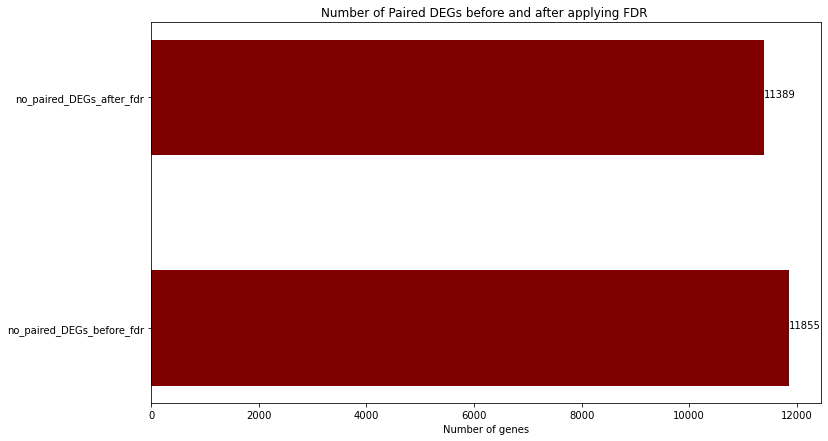

In [33]:
# ploting the number of paired_DEGs before and after FDR
x = ['no_paired_DEGs_before_fdr','no_paired_DEGs_after_fdr']
y = [no_paired_DEGs_before_fdr,no_paired_DEGs_after_fdr]
fig, _ = plt.subplots(figsize =(12, 7)) 
plt.barh(x,y, color ='maroon',height = 0.5) 

#printing each barh value beside it
for  location,value in enumerate(y):
    plt.text(value,location, str(value))

plt.title('Number of Paired DEGs before and after applying FDR ')
plt.xlabel('Number of genes')
# plt.savefig('Number of Paired DEGs before and after applying FDR.png')
plt.show()


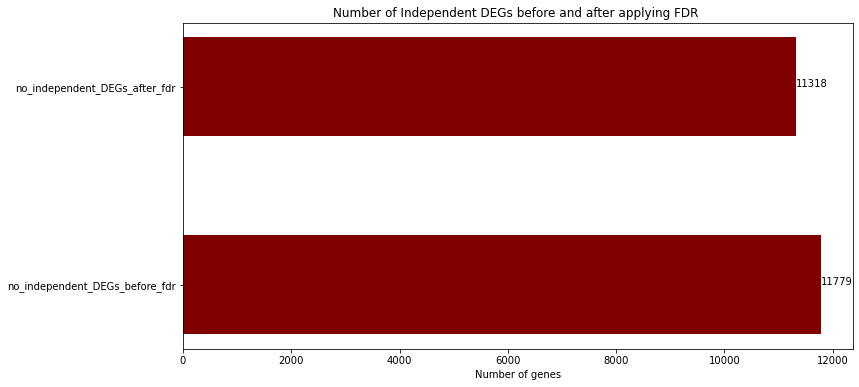

In [45]:
# ploting the number of independent_DEGs before and after FDR
x = ['no_independent_DEGs_before_fdr','no_independent_DEGs_after_fdr']
y = [no_independent_DEGs_before_fdr,no_independent_DEGs_after_fdr] 
fig, ax = plt.subplots(figsize =(12, 6)) 
ax.barh(x,y, color ='maroon',height = 0.5) 

#printing each barh value beside it
for  location,value in enumerate(y):
    plt.text(value,location, str(value))
plt.title('Number of Independent DEGs before and after applying FDR ')
plt.xlabel('Number of genes')
# plt.savefig('Number of Independent DEGs before and after applying FDR.png')
plt.show()

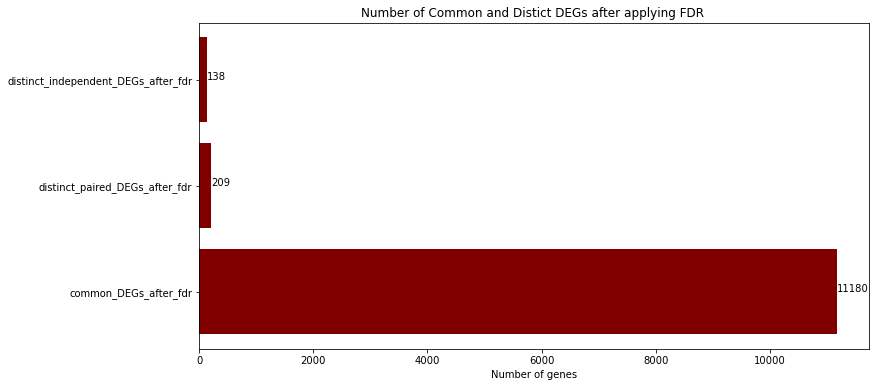

In [35]:
# ploting the number of common DEGs after FDR between Paired_DEGs and independent_DEGs
# and distict DEGs ones
y1= common_DEGs_after_fdr.shape[0]
y2 =distinct_paired_DEGs_after_fdr.shape[0]
y3 =distinct_independent_DEGs_after_fdr.shape[0]
x = ['common_DEGs_after_fdr','distinct_paired_DEGs_after_fdr','distinct_independent_DEGs_after_fdr']
y = [y1,y2,y3] 
fig, _ = plt.subplots(figsize =(12, 6)) 
plt.barh(x,y, color ='maroon') 

for  location,value in enumerate(y):
    plt.text(value,location, str(value))
plt.title('Number of Common and Distict DEGs after applying FDR ')
plt.xlabel('Number of genes')
# plt.savefig('Number of Common and Distict DEGs after applying FDR.png')
plt.show()

## Saving Data  <a class="anchor" id="saving"></a>

In [36]:
#saving our dfs to .csv files
# paired_DEGs_before_fdr.to_csv('paired_DEGs_before_fdr.csv',index= False)
# paired_DEGs_after_fdr.to_csv('paired_DEGs_after_fdr.csv',index= False)
# independent_DEGs_before_fdr.to_csv('independent_DEGs_before_fdr.csv',index= False)
# independent_DEGs_after_fdr.to_csv('independent_DEGs_after_fdr.csv',index= False)
# common_DEGs_after_fdr.to_csv('common_DEGs_after_fdr.csv',index= False)
# distinct_independent_DEGs_after_fdr.to_csv('distinct_independent_DEGs_after_fdr.csv',index= False)
# distinct_paired_DEGs_after_fdr.to_csv('distinct_paired_DEGs_after_fdr.csv',index= False)

In [37]:
paired_DEGs_after_fdr


,Gene_Hugo_Symbol,Entrez_Gene_Id
0,HIST3H2A,92815
2,LXN,56925
3,CNKSR2,22866
6,GSDMD,79792
7,AKR1C1,1645
...,...,...
19641,ZNF521,25925
19642,SPINT2,10653
19643,HAVCR2,84868
19646,CTD-2116N17.1,0


# Momen 

In [38]:
# alpha = 0.01
#create empty dataframe with the same length of health_df
# import numpy as np
# healthy_df.replace('0',np.nan,inplace = True)
# healthy_df.dropna(how = 'any',axis=0,inplace=True)
pearson_spearman_df = pd.DataFrame(index = [x for x in range(len(healthy_df))],
                              columns={'Gene_Hugo_Symbol','Entrez_Gene_Id',
                                      'r_value_pearson','r_value_spearman'})

pearson_spearman_df['Gene_Hugo_Symbol']= healthy_df['Hugo_Symbol']
pearson_spearman_df['Entrez_Gene_Id']= healthy_df['Entrez_Gene_Id']

for i in range(len(healthy_df)):
    
    GE_when_healthy = healthy_df.iloc[i,2:] 
    GE_when_cancerous = cancerous_df.iloc[i,2:] 
    r_value1,_ = pearsonr(GE_when_healthy, GE_when_cancerous)
    r_value2,_ = spearmanr(GE_when_healthy, GE_when_cancerous)
        
    pearson_spearman_df.loc[i,'r_value_pearson']= r_value1
    pearson_spearman_df.loc[i,'r_value_spearman']= r_value2



C:\Users\Mohamed Galloul\anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\Mohamed Galloul\anaconda3\lib\site-packages\scipy\stats\stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [39]:
    healthy_df
    

,Hugo_Symbol,Entrez_Gene_Id,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,TCGA-22-5471,TCGA-22-4609,TCGA-22-5482,TCGA-56-8082,TCGA-22-5483,TCGA-56-8623,TCGA-33-4587,TCGA-56-7579,TCGA-43-3394,TCGA-34-8454,TCGA-77-7338,TCGA-43-6143,TCGA-43-6773,TCGA-51-4080,TCGA-34-7107,TCGA-39-5040,TCGA-43-6771,TCGA-92-7340,TCGA-77-7138,TCGA-77-7142,TCGA-56-7823,TCGA-22-5491,TCGA-22-5481,TCGA-90-7767,TCGA-77-8008,TCGA-56-7730,TCGA-33-6737,TCGA-56-7582,TCGA-56-7731,TCGA-77-7337,TCGA-43-7658,TCGA-56-8201,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
0,HIST3H2A,92815,62.12,130.60,33.06,35.50,73.03,60.39,92.05,66.65,54.33,15.56,55.49,30.34,14.45,100.83,131.51,59.55,87.03,71.50,23.08,48.87,72.52,115.97,45.21,74.58,8.92,27.44,40.64,35.76,59.13,20.86,37.05,48.18,51.71,49.56,72.01,21.94,27.44,35.00,76.17,28.86,90.77,59.55,40.07,22.92,29.91,82.29,4.70,37.32,43.63,77.25
1,LIN7B,64130,185.11,283.05,119.26,169.07,165.57,161.02,131.51,198.47,175.07,147.06,151.22,84.63,72.01,248.00,363.56,218.79,173.85,253.23,120.10,131.51,110.43,205.50,162.14,363.56,120.10,85.22,214.27,126.12,138.10,214.27,170.25,112.77,111.21,180.02,197.09,111.21,93.35,114.36,231.32,181.28,185.11,119.26,102.97,123.50,264.03,194.36,166.73,105.15,185.11,356.05
2,LXN,56925,909.17,819.30,412.00,743.43,1340.84,607.87,1709.26,1709.26,603.67,555.41,693.58,616.37,518.15,813.63,753.83,769.69,642.59,624.99,854.13,802.41,1037.29,532.74,1088.92,842.36,507.46,769.69,514.56,974.50,1340.84,679.29,444.72,928.30,1233.75,718.08,1051.79,2367.90,389.72,836.53,669.92,460.44,813.63,2400.97,543.96,2193.99,540.19,521.76,253.23,764.36,518.15,878.17
3,CNKSR2,22866,41.81,18.29,40.93,67.12,54.72,29.27,20.26,23.76,28.04,39.22,46.50,42.41,37.85,51.35,24.81,53.95,35.00,54.72,53.95,19.25,34.51,51.71,12.64,25.35,43.32,64.34,43.63,77.25,40.93,33.30,33.30,58.71,29.27,32.59,44.89,55.49,24.11,56.28,39.79,38.40,34.51,70.01,57.49,57.89,67.12,34.51,22.10,31.90,28.24,49.91
4,SCML1,6322,133.36,214.27,108.14,109.66,190.34,211.31,96.01,208.38,120.10,239.52,124.37,249.73,103.69,214.27,162.14,195.72,127.89,127.00,119.26,124.37,180.02,115.16,105.89,334.46,199.85,208.38,195.72,202.66,214.27,132.44,114.36,176.29,195.72,105.89,111.21,228.13,130.60,165.57,159.90,202.66,251.48,209.84,120.10,109.66,155.50,162.14,277.20,86.43,164.42,155.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19643,HAVCR2,84868,423.61,529.06,660.68,620.67,518.15,848.22,366.09,1073.91,363.56,366.09,397.93,497.00,791.35,503.95,547.75,470.14,507.46,368.65,320.80,540.19,808.00,656.11,693.58,412.00,698.41,406.31,397.93,420.68,703.28,185.11,414.87,438.59,551.56,287.01,341.51,373.81,473.41,525.39,480.04,450.94,559.28,579.04,420.68,366.09,334.46,258.57,329.84,1030.12,665.29,633.73
19644,RP1-66C13.4,0,0.00,0.00,1.79,3.32,0.00,0.00,1.79,0.00,0.00,0.00,6.52,5.77,2.20,0.00,2.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.86,0.00,0.00,0.00,4.70,5.45,0.00,0.00,1.81,0.00,0.00,0.00,2.03,4.13,0.00,5.41,0.00,3.35,0.00,4.86,0.00,0.00,2.81,2.84,0.00,0.00,1.08,0.00
19645,C3orf79,152118,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.16,0.00,2.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.10,1.08,0.00,0.00,0.00,0.00,2.61,1.07,0.00,0.00,1.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.07,0.00,0.00
19646,CTD-2116N17.1,0,0.00,0.00,0.99,3.59,2.23,3.35,0.00,7.34,1.41,0.00,2.63,0.00,1.00,3.03,0.00,2.97,0.57,1.00,0.00,1.07,7.69,2.97,3.50,0.54,0.97,0.96,0.00,1.83,1.75,0.56,0.00,1.75,3.35,4.31,0.00,4.13,2.61,2.66,0.55,1.45,6.94,1.00,0.00,4.58,0.96,3.06,1.83,1.77,3.63,2.56


In [40]:
max_cc_pearson = pearson_spearman_df['r_value_pearson'].max()
min_cc_pearson = pearson_spearman_df['r_value_pearson'].min()
max_cc_spearman = pearson_spearman_df['r_value_spearman'].max()
min_cc_spearman = pearson_spearman_df['r_value_spearman'].min()

Int64Index([8433], dtype='int64')

Int64Index([14706], dtype='int64')

In [49]:
max_gene_detail_pearson = pearson_spearman_df[pearson_spearman_df['r_value_pearson']==max_cc_pearson][['Gene_Hugo_Symbol','Entrez_Gene_Id']]
max_gene_index_pearson = max_gene_detail_pearson['Entrez_Gene_Id'].index
max_gene_index_pearson
max_gene_pearson =  healthy_df.loc[max_gene_index_pearson].iloc[:,:2]
GEs_healthy_max_gene_pearson = healthy_df.loc[max_gene_index_pearson].iloc[:,2:]
GEs_healthy_max_gene_pearson 

,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,TCGA-22-5471,TCGA-22-4609,TCGA-22-5482,TCGA-56-8082,TCGA-22-5483,TCGA-56-8623,TCGA-33-4587,TCGA-56-7579,TCGA-43-3394,TCGA-34-8454,TCGA-77-7338,TCGA-43-6143,TCGA-43-6773,TCGA-51-4080,TCGA-34-7107,TCGA-39-5040,TCGA-43-6771,TCGA-92-7340,TCGA-77-7138,TCGA-77-7142,TCGA-56-7823,TCGA-22-5491,TCGA-22-5481,TCGA-90-7767,TCGA-77-8008,TCGA-56-7730,TCGA-33-6737,TCGA-56-7582,TCGA-56-7731,TCGA-77-7337,TCGA-43-7658,TCGA-56-8201,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
8433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
min_gene_detail_pearson = pearson_spearman_df[pearson_spearman_df['r_value_pearson']==min_cc_pearson][['Gene_Hugo_Symbol','Entrez_Gene_Id']]
min_gene_index_pearson = min_gene_detail_pearson['Entrez_Gene_Id'].index
min_gene_index_pearson
min_gene_pearson =  healthy_df.loc[min_gene_index_pearson].iloc[:,:2]
GEs_healthy_min_gene_pearson  = healthy_df.loc[min_gene_index_pearson].iloc[:,2:]
GEs_healthy_min_gene_pearson 

,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,TCGA-22-5471,TCGA-22-4609,TCGA-22-5482,TCGA-56-8082,TCGA-22-5483,TCGA-56-8623,TCGA-33-4587,TCGA-56-7579,TCGA-43-3394,TCGA-34-8454,TCGA-77-7338,TCGA-43-6143,TCGA-43-6773,TCGA-51-4080,TCGA-34-7107,TCGA-39-5040,TCGA-43-6771,TCGA-92-7340,TCGA-77-7138,TCGA-77-7142,TCGA-56-7823,TCGA-22-5491,TCGA-22-5481,TCGA-90-7767,TCGA-77-8008,TCGA-56-7730,TCGA-33-6737,TCGA-56-7582,TCGA-56-7731,TCGA-77-7337,TCGA-43-7658,TCGA-56-8201,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
14706,285.03,214.27,336.79,295.11,312.0,206.94,295.11,214.27,283.05,281.09,329.84,220.32,299.25,248.0,154.42,267.73,454.09,256.78,320.8,269.6,363.56,320.8,314.17,131.51,309.83,314.17,269.6,289.02,265.87,293.07,307.69,236.21,287.01,291.04,295.11,312.0,265.87,255.0,249.73,241.19,249.73,287.01,297.17,339.14,248.0,307.69,248.0,190.34,361.04,287.01


In [51]:
max_gene_detail_spearman = pearson_spearman_df[pearson_spearman_df['r_value_spearman']==max_cc_spearman][['Gene_Hugo_Symbol','Entrez_Gene_Id']]
max_gene_index_spearman = max_gene_detail_spearman['Entrez_Gene_Id'].index
max_gene_index_spearman
max_gene_spearman =  healthy_df.loc[max_gene_index_spearman].iloc[:,:2]
GEs_healthy_max_gene_spearman = healthy_df.loc[max_gene_index_spearman].iloc[:,2:]
GEs_healthy_max_gene_spearman 

,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,TCGA-22-5471,TCGA-22-4609,TCGA-22-5482,TCGA-56-8082,TCGA-22-5483,TCGA-56-8623,TCGA-33-4587,TCGA-56-7579,TCGA-43-3394,TCGA-34-8454,TCGA-77-7338,TCGA-43-6143,TCGA-43-6773,TCGA-51-4080,TCGA-34-7107,TCGA-39-5040,TCGA-43-6771,TCGA-92-7340,TCGA-77-7138,TCGA-77-7142,TCGA-56-7823,TCGA-22-5491,TCGA-22-5481,TCGA-90-7767,TCGA-77-8008,TCGA-56-7730,TCGA-33-6737,TCGA-56-7582,TCGA-56-7731,TCGA-77-7337,TCGA-43-7658,TCGA-56-8201,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
631,0.71,42.71,1.17,12.18,17.9,189.02,91.41,1.57,0.71,2.63,40.93,0.0,67.59,1.58,6.16,89.51,529.06,507.46,28.65,92.7,20.26,201.25,4.39,19.11,138.1,0.69,318.57,15.91,11.82,189.02,0.0,241.19,57.89,3.86,94.01,0.0,19.25,45.21,2.89,262.2,33.3,1.66,8.38,16.15,18.16,1.6,42.11,0.0,25.72,258.57


In [52]:
min_gene_detail_spearman = pearson_spearman_df[pearson_spearman_df['r_value_spearman']==min_cc_spearman][['Gene_Hugo_Symbol','Entrez_Gene_Id']]
min_gene_index_spearman = min_gene_detail_spearman['Entrez_Gene_Id'].index
min_gene_index_spearman
min_gene_spearman =  healthy_df.loc[min_gene_index_spearman].iloc[:,:2]
GEs_healthy_min_gene_spearman = healthy_df.loc[min_gene_index_spearman].iloc[:,2:]
GEs_healthy_min_gene_spearman 

,TCGA-43-7657,TCGA-58-8386,TCGA-22-5478,TCGA-22-5472,TCGA-43-5670,TCGA-60-2709,TCGA-22-5489,TCGA-77-8007,TCGA-22-5471,TCGA-22-4609,TCGA-22-5482,TCGA-56-8082,TCGA-22-5483,TCGA-56-8623,TCGA-33-4587,TCGA-56-7579,TCGA-43-3394,TCGA-34-8454,TCGA-77-7338,TCGA-43-6143,TCGA-43-6773,TCGA-51-4080,TCGA-34-7107,TCGA-39-5040,TCGA-43-6771,TCGA-92-7340,TCGA-77-7138,TCGA-77-7142,TCGA-56-7823,TCGA-22-5491,TCGA-22-5481,TCGA-90-7767,TCGA-77-8008,TCGA-56-7730,TCGA-33-6737,TCGA-56-7582,TCGA-56-7731,TCGA-77-7337,TCGA-43-7658,TCGA-56-8201,TCGA-85-7710,TCGA-56-7580,TCGA-43-6647,TCGA-90-6837,TCGA-56-8083,TCGA-51-4079,TCGA-56-7222,TCGA-22-4593,TCGA-51-4081,TCGA-56-8309
9207,0.48,0.0,3.06,0.49,0.0,0.0,0.49,2.58,0.0,0.0,1.22,0.0,0.0,5.02,0.48,0.0,0.0,0.0,0.0,3.72,0.48,1.2,2.23,2.53,0.0,0.47,0.0,0.0,2.56,0.0,0.49,0.0,2.89,2.32,0.46,0.0,0.84,0.48,1.55,0.0,0.0,0.0,1.23,0.47,0.0,3.0,0.0,0.0,0.0,0.46
